<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/DTEU-Machine-Learning-2025-Zaiets/blob/main/Zaiets_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

#Аналіз датасету#

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [8]:
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [14]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

df['smoking_history'] = df['smoking_history'].map({'No Info': 0,'never': 1, 'former': 2, 'current': 3, 'not current': 4,'ever': 5})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [22]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [30]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,1.310975,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.409267,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [31]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


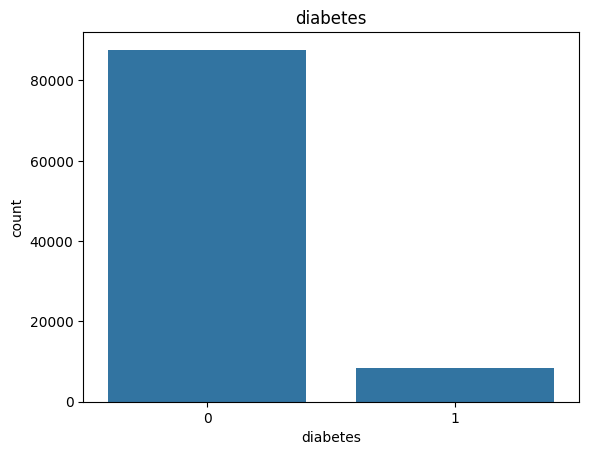

In [32]:
sns.countplot(x='diabetes', data=df)
plt.title('diabetes')
plt.show()

In [35]:
df.corrwith(df['diabetes']).sort_values(ascending=False)

,0
diabetes,1.000000
blood_glucose_level,0.424336
HbA1c_level,0.406408
age,0.264927
bmi,0.214932
hypertension,0.195710
heart_disease,0.170711
smoking_history,0.087470
gender,0.037613


Всі ознаки мають додатню кореляцію

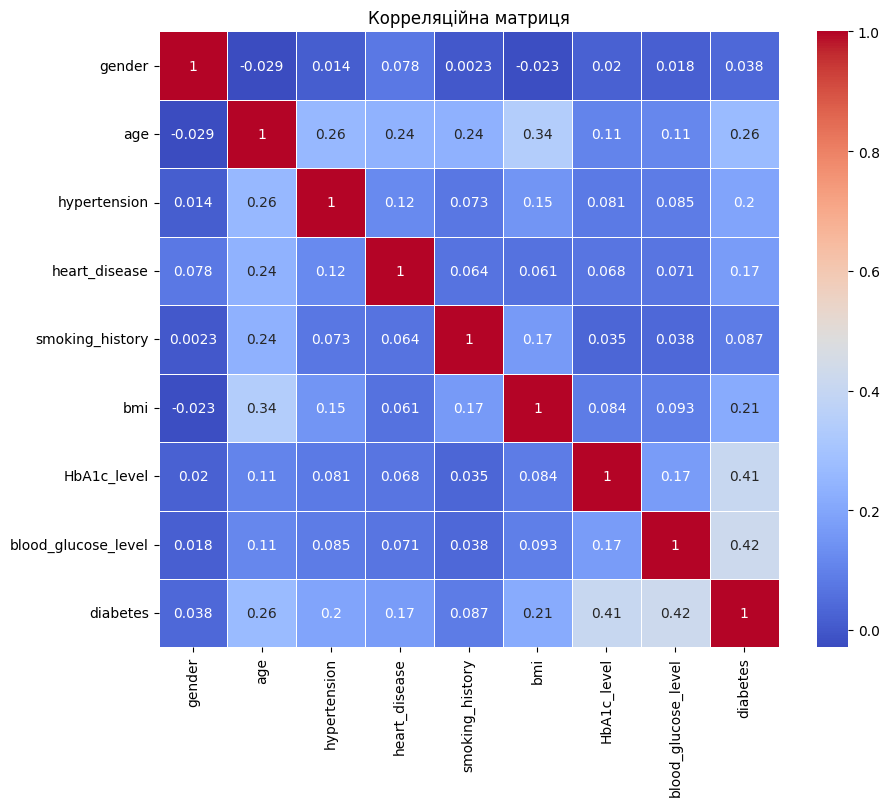

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

#Задача класифіакації датасету, логістична регресія#

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [61]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Балансуємо лише TRAIN з допомогою SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. Перевіримо нову кількість зразків:
print("До балансування:")
print(y_train.value_counts())

print("\nПісля SMOTE:")
print(y_train_balanced.value_counts())

# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

До балансування:
diabetes
0    70155
1     6761
Name: count, dtype: int64

Після SMOTE:
diabetes
0    70155
1    70155
Name: count, dtype: int64


Model                Accuracy   Precision  Recall     F1        
------------------------------------------------------------
Logistic Regression  0.9568     0.9542     0.9568     0.9538
Ridge                0.9374     0.9408     0.9374     0.9218
SGD                  0.9573     0.9567     0.9573     0.9522
SVC                  0.9610     0.9615     0.9610     0.9564

Cross-validation scores (accuracy):
Logistic Regression  Mean: 0.9592, Std: 0.0011
Ridge                Mean: 0.9392, Std: 0.0004
SGD                  Mean: 0.9587, Std: 0.0013
SVC                  Mean: 0.9625, Std: 0.0007


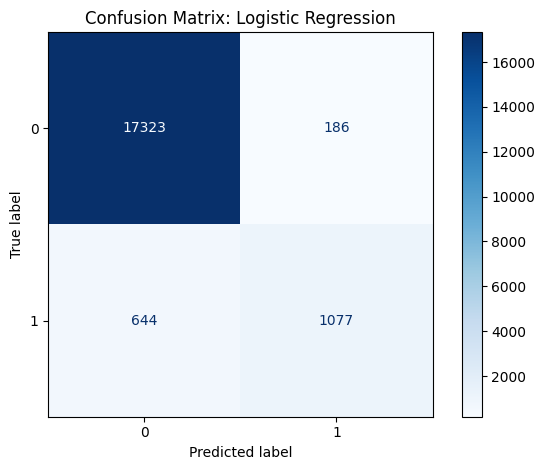

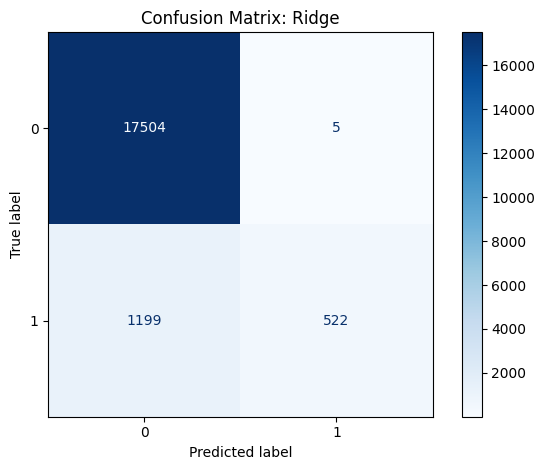

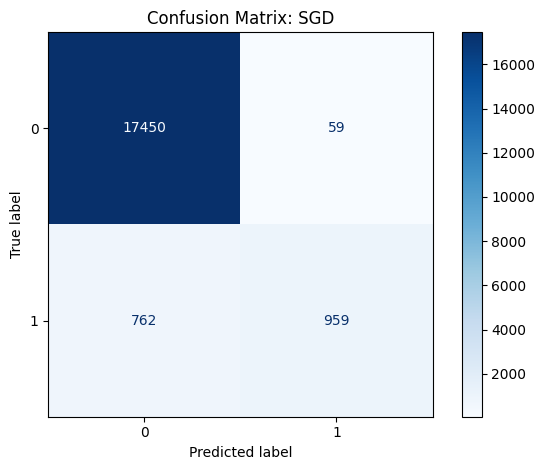

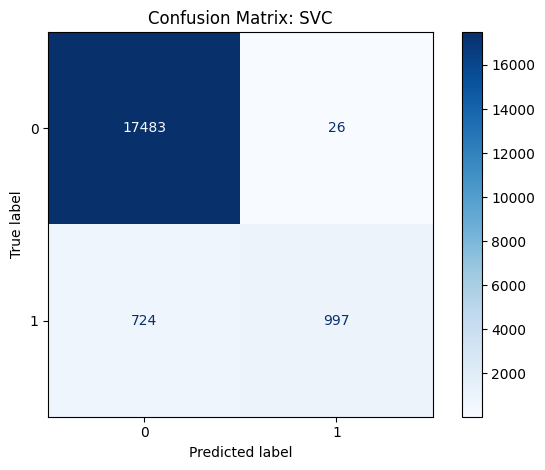

In [63]:
# Моделі, їх метрика та графіки
models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge': RidgeClassifier(),
    'SGD': SGDClassifier(),
    'SVC': SVC()
}

print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{name:<20} {acc:.4f}     {prec:.4f}     {rec:.4f}     {f1:.4f}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.tight_layout()

# Cross-Validation Scores (CVS)
print("\nCross-validation scores (accuracy):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name:<20} Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

plt.show()

За результатами, SVC є №1 моделлю для передбачення, а Logistic Regression є №2.
У той самий час Ridge показав себе найгірше.

In [74]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'SGD': {
        'loss': ['log_loss', 'hinge'],
        'alpha': [0.0001, 0.001, 0.01],
        'penalty': ['l2', 'l1']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

In [75]:
best_models = {}

# Перебір моделей
for name, model in models.items():
    print(f"\n🔍 Підбір параметрів для {name}...")

    search = HalvingGridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='accuracy',
        cv=3,
        factor=2,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_models[name] = best_model

    print(f"✅ Найкращі параметри: {search.best_params_}")

    # Оцінка
    y_pred = best_model.predict(X_test)
    print("📊 Класифікаційний звіт:")
    print(classification_report(y_test, y_pred))


🔍 Підбір параметрів для Logistic Regression...
✅ Найкращі параметри: {'C': 0.1, 'solver': 'liblinear'}
📊 Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.62      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230


🔍 Підбір параметрів для Ridge...
✅ Найкращі параметри: {'alpha': 1.0}
📊 Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17509
           1       0.99      0.30      0.46      1721

    accuracy                           0.94     19230
   macro avg       0.96      0.65      0.72     19230
weighted avg       0.94      0.94      0.92     19230


🔍 Підбір параметрів для SGD...
✅ Найкращі параметри: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
📊 Класифікаційний 

In [76]:
# Use the best model from tuning
model = best_models['SVC']

# Predict on the test set
y_pred = model.predict(X_test)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

# Show 10 random results
print("🔎 Випадкові 10 порівнянь реальних і передбачених значень:")
display(comparison_df.sample(10))

🔎 Випадкові 10 порівнянь реальних і передбачених значень:


,Actual,Predicted
1734,0,0
6628,0,0
2149,0,0
18729,0,0
6397,0,0
17476,0,0
3171,0,0
1515,0,0
15281,0,0
1910,0,0


Висновки: Була розв'язана задача класифіакації із логістичною регресією, завантажено датасет, проаналізовано та підготовлено дані, побудовано моделі класифікації, підібрані оптимальні параметри за допомогою HalvingGridSearchCV, де ми дізналися що модель SVC справляється найкраще. Також було виведено порівняння справжніх та прогнозованих результатів для 10 випадкових зразків для SVC моделі.